# Chapter 2.

## 02-1 훈련 세트와 테스트 세트


In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
#생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트 만들기
fish_data = [(l, w) for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [4]:
#KNeigborsClassifier()불러오기
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [5]:
#훈련세트, 입력값 
train_input = fish_data[:35]
#훈련세트, 정답
train_target = fish_target[:35]
#테스트세트, 입력값
test_input = fish_data[35:]
#테스트세트, 정답
test_target = fish_target[35:]

In [6]:
kn=kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 넘파이로 배열 만들어 random shuffling하고 새 train/test 셋 만들기

In [7]:
import numpy as np

In [8]:
#array로 만들기
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [9]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [10]:
print(input_arr.shape)

(49, 2)


In [11]:
np.random.seed(42) #책과 같은 결과 위해 seed 42
index = np.arange(49)
np.random.shuffle(index) #만든 index를 무작위로 섞기

In [12]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [13]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [14]:
print(input_arr[13], train_input[0]) #배열의 14번째 원소가 shuffle 되어 0번째 원소로 바뀜

[ 32. 340.] [ 32. 340.]


In [15]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [16]:
import matplotlib.pyplot as plt

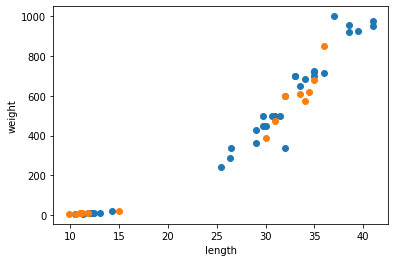

In [17]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [18]:
kn=kn.fit(train_input, train_target)

In [19]:
kn.score(test_input, test_target)

1.0

In [20]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [21]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 02-2 데이터 전처리


In [22]:
import numpy as np

In [23]:
fish_data = np.column_stack((fish_length, fish_weight))

In [24]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [25]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [28]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [29]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [30]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
# 수상한 도미 한 마리
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [32]:
# 새로운 값을 잘 분류하나 실험
print(kn.predict([[25, 150]]))

[0.]


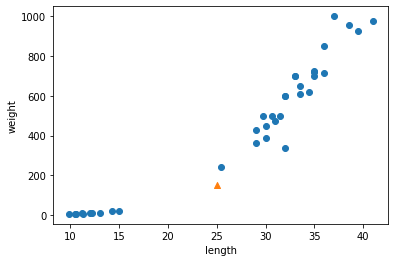

In [33]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
distances, indexes = kn.kneighbors([[25, 150]])

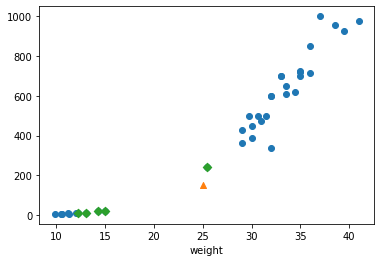

In [36]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

`Ref`: [matplotlib marker](https://matplotlib.org/stable/api/markers_api.html)

In [37]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [38]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [39]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


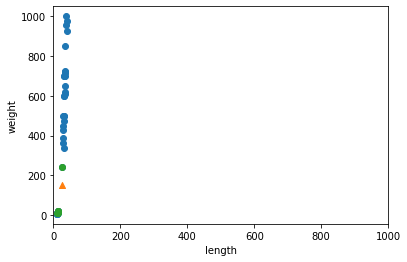

In [40]:
#기준을 맞춰라
plt.scatter(train_input[:, 0], train_input[: ,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [42]:
#표준 점수
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [43]:
train_scaled = (train_input - mean)/std

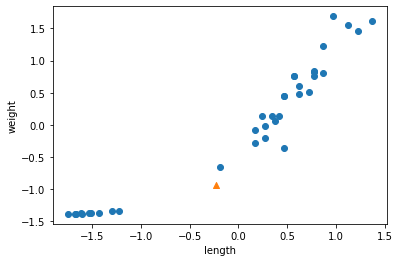

In [44]:
#전처리 데이터로 모델 훈련
new = ([25, 150]-mean)/std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [45]:
#표준화된 데이터로 다시 적합
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
test_scaled = (test_input - mean)/std

In [47]:
kn.score(test_scaled, test_target)

1.0

In [48]:
print(kn.predict([new]))

[1.]
